In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [3]:
features_virus_mirnas = pd.read_csv('/content/drive/MyDrive/features_virus_miRNAs.csv')

# The negative set is composed of a random set of hsa hairpin-like sequences 
features_unlabeled_hairpins = pd.read_csv('/content/drive/MyDrive/features_unlabeled_hairpins.csv')

In [4]:
features_virus_mirnas.drop('sequence_names', inplace=True, axis=1)

In [5]:
features_virus_mirnas['class'] = 1

In [6]:
features_unlabeled_hairpins.drop('sequence_names', inplace=True, axis=1)

In [7]:
features_unlabeled_hairpins['class'] = 0

In [8]:
da = [features_virus_mirnas, features_unlabeled_hairpins]

In [9]:
df = pd.concat(da)
df.head()

,nt_proportion0,nt_proportion1,nt_proportion2,nt_proportion3,dinucleotide_proportion0,dinucleotide_proportion1,dinucleotide_proportion2,dinucleotide_proportion3,dinucleotide_proportion4,dinucleotide_proportion5,...,efe,ensemble_frequency,diversity,mfe_efe_difference,dQ,dG,mfei1,mfei2,mfei4,class
0,0.292308,0.169231,0.200000,0.338462,0.109375,0.015625,0.078125,0.093750,0.062500,0.031250,...,-27.28,0.457857,1.67,0.007385,0.066635,-0.412308,-1.116667,-0.137436,-1.072000,1
1,0.276923,0.215385,0.230769,0.276923,0.125000,0.078125,0.046875,0.031250,0.078125,0.000000,...,-23.95,0.154283,5.77,0.017692,0.228730,-0.350769,-0.786207,-0.116923,-1.036364,1
2,0.242424,0.287879,0.227273,0.242424,0.061538,0.061538,0.061538,0.046154,0.061538,0.138462,...,-27.02,0.426696,2.62,0.007879,0.107199,-0.401515,-0.779412,-0.100379,-1.204545,1
3,0.200000,0.257143,0.300000,0.242857,0.028986,0.057971,0.057971,0.057971,0.057971,0.072464,...,-32.11,0.101080,6.03,0.020143,0.214866,-0.438571,-0.787179,-0.146190,-1.228000,1
4,0.258065,0.193548,0.225806,0.322581,0.098361,0.016393,0.049180,0.081967,0.049180,0.049180,...,-26.28,0.639769,0.94,0.004516,0.040681,-0.419355,-1.000000,-0.139785,-1.238095,1


In [10]:
df.fillna(value=0, inplace = True)

In [11]:
df.isnull().sum().max()

0

In [55]:
df = df.sample(frac=1)


positive_df = df.loc[df['class'] == 1]
negative_df = df.loc[df['class'] == 0][:569]

normal_distributed_df = pd.concat([positive_df, negative_df])

new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,nt_proportion0,nt_proportion1,nt_proportion2,nt_proportion3,dinucleotide_proportion0,dinucleotide_proportion1,dinucleotide_proportion2,dinucleotide_proportion3,dinucleotide_proportion4,dinucleotide_proportion5,...,efe,ensemble_frequency,diversity,mfe_efe_difference,dQ,dG,mfei1,mfei2,mfei4,class
686740,0.179000,0.224000,0.343000,0.254000,0.045000,0.030000,0.061000,0.045000,0.061000,0.061000,...,-21.97,0.056000,9.54,0.026000,0.386000,-0.301000,-0.532000,-0.151000,-0.878000,0
90490,0.302000,0.238000,0.222000,0.238000,0.097000,0.048000,0.081000,0.081000,0.113000,0.032000,...,-13.53,0.357000,7.81,0.010000,0.384000,-0.205000,-0.445000,-0.068000,-0.679000,0
447,0.353659,0.170732,0.158537,0.317073,0.111111,0.111111,0.049383,0.086420,0.061728,0.012346,...,-34.09,0.325206,2.40,0.008415,0.068815,-0.407317,-1.237037,-0.203659,-1.151724,1
873626,0.239000,0.183000,0.296000,0.282000,0.086000,0.043000,0.043000,0.071000,0.057000,0.057000,...,-17.01,0.038000,19.54,0.028000,0.894000,-0.211000,-0.441000,-0.106000,-1.154000,0
207,0.178571,0.250000,0.267857,0.303571,0.018182,0.072727,0.072727,0.018182,0.072727,0.036364,...,-25.43,0.357659,2.42,0.011250,0.104883,-0.442857,-0.855172,-0.147619,-1.240000,1


In [40]:
X = new_df.drop('class', axis=1)
y = new_df['class']

In [41]:
from sklearn.feature_selection import mutual_info_classif


mutual = mutual_info_classif(X, y)

In [42]:
mutual = pd.Series(mutual)
mutual.index = X.columns
mutual.sort_values(ascending=False)

 mfe_efe_difference           0.517103
 dinucleotide_proportion8     0.403784
 triplets19                   0.401392
 triplets7                    0.399462
 dinucleotide_proportion13    0.398367
                                ...   
 triplets10                   0.060562
 bp_number                    0.046437
 triplets20                   0.034808
 triplets23                   0.034257
 triplets21                   0.014477
Length: 73, dtype: float64

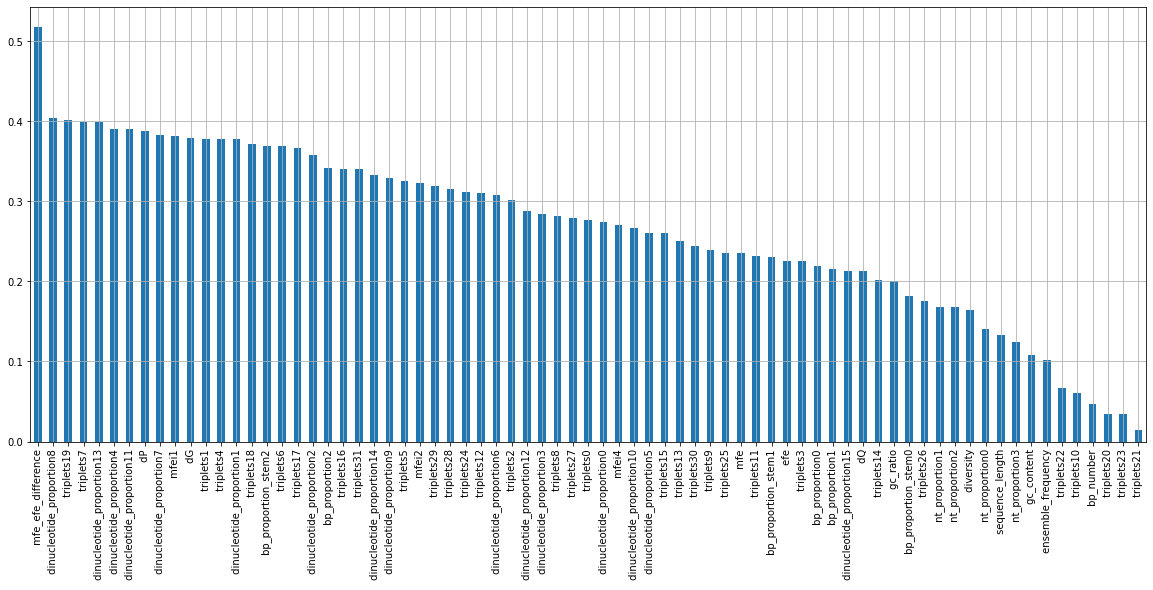

In [43]:
mutual.sort_values(ascending=False).plot.bar(figsize=(20, 8)).grid()

In [44]:
from sklearn.feature_selection import SelectKBest


sel_cols = SelectKBest(mutual_info_classif, k=56)
z = sel_cols.fit(X, y)

In [45]:
X.columns[sel_cols.get_support()]

Index([' dinucleotide_proportion0', ' dinucleotide_proportion1',
       ' dinucleotide_proportion2', ' dinucleotide_proportion3',
       ' dinucleotide_proportion4', ' dinucleotide_proportion5',
       ' dinucleotide_proportion6', ' dinucleotide_proportion7',
       ' dinucleotide_proportion8', ' dinucleotide_proportion9',
       ' dinucleotide_proportion10', ' dinucleotide_proportion11',
       ' dinucleotide_proportion12', ' dinucleotide_proportion13',
       ' dinucleotide_proportion14', ' dinucleotide_proportion15', ' dP',
       ' bp_proportion0', ' bp_proportion1', ' bp_proportion2',
       ' bp_proportion_stem1', ' bp_proportion_stem2', ' triplets0',
       ' triplets1', ' triplets2', ' triplets3', ' triplets4', ' triplets5',
       ' triplets6', ' triplets7', ' triplets8', ' triplets9', ' triplets11',
       ' triplets12', ' triplets13', ' triplets14', ' triplets15',
       ' triplets16', ' triplets17', ' triplets18', ' triplets19',
       ' triplets24', ' triplets25', ' triple

In [46]:
new = new_df.filter([' dinucleotide_proportion0', ' dinucleotide_proportion1',
       ' dinucleotide_proportion2', ' dinucleotide_proportion3',
       ' dinucleotide_proportion4', ' dinucleotide_proportion5',
       ' dinucleotide_proportion6', ' dinucleotide_proportion7',
       ' dinucleotide_proportion8', ' dinucleotide_proportion9',
       ' dinucleotide_proportion10', ' dinucleotide_proportion11',
       ' dinucleotide_proportion12', ' dinucleotide_proportion13',
       ' dinucleotide_proportion14', ' dinucleotide_proportion15', ' gc_ratio',
       ' dP', ' bp_proportion0', ' bp_proportion1', ' bp_proportion2',
       ' bp_proportion_stem1', ' bp_proportion_stem2', ' triplets0',
       ' triplets1', ' triplets2', ' triplets3', ' triplets4', ' triplets5',
       ' triplets6', ' triplets7', ' triplets8', ' triplets9', ' triplets11',
       ' triplets12', ' triplets13', ' triplets15', ' triplets16',
       ' triplets17', ' triplets18', ' triplets19', ' triplets24',
       ' triplets25', ' triplets27', ' triplets28', ' triplets29',
       ' triplets30', ' triplets31', ' mfe', ' efe', ' mfe_efe_difference',
       ' dQ', ' dG', ' mfei1', ' mfei2', ' mfei4', 'class'], axis=1)

In [48]:
new_X = new.drop('class', axis=1)
new_y = new['class']

In [49]:
new_X

,dinucleotide_proportion0,dinucleotide_proportion1,dinucleotide_proportion2,dinucleotide_proportion3,dinucleotide_proportion4,dinucleotide_proportion5,dinucleotide_proportion6,dinucleotide_proportion7,dinucleotide_proportion8,dinucleotide_proportion9,...,triplets30,triplets31,mfe,efe,mfe_efe_difference,dQ,dG,mfei1,mfei2,mfei4
956975,0.131000,0.066000,0.115000,0.049000,0.066000,0.000000,0.000000,0.082000,0.148000,0.033000,...,0.018,0.000000,-12.4,-13.61,0.020000,0.284000,-0.200000,-0.477000,-0.100000,-0.620000
706379,0.105000,0.026000,0.066000,0.105000,0.092000,0.039000,0.000000,0.053000,0.053000,0.066000,...,0.058,0.130000,-18.9,-20.37,0.019000,0.260000,-0.245000,-0.610000,-0.082000,-0.945000
285,0.041096,0.054795,0.068493,0.082192,0.068493,0.041096,0.013699,0.109589,0.054795,0.095890,...,0.000,0.000000,-34.4,-34.90,0.006757,0.050387,-0.464865,-1.011765,-0.154955,-1.274074
501177,0.083000,0.024000,0.083000,0.036000,0.048000,0.060000,0.000000,0.095000,0.036000,0.024000,...,0.026,0.104000,-20.7,-22.53,0.022000,0.246000,-0.244000,-0.627000,-0.061000,-0.828000
249,0.111111,0.055556,0.083333,0.069444,0.111111,0.055556,0.041667,0.041667,0.069444,0.069444,...,0.000,0.017857,-21.4,-22.44,0.014247,0.211672,-0.293151,-0.668750,-0.146575,-0.930435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116377,0.079000,0.039000,0.092000,0.066000,0.079000,0.039000,0.013000,0.092000,0.079000,0.066000,...,0.000,0.015000,-19.7,-20.70,0.013000,0.554000,-0.256000,-0.532000,-0.064000,-0.788000
794933,0.145000,0.060000,0.036000,0.096000,0.096000,0.108000,0.012000,0.060000,0.024000,0.048000,...,0.000,0.043000,-25.2,-26.49,0.015000,0.188000,-0.300000,-0.663000,-0.075000,-1.050000
457905,0.200000,0.010000,0.050000,0.110000,0.040000,0.050000,0.000000,0.020000,0.000000,0.000000,...,0.032,0.140000,-6.3,-8.92,0.026000,0.716000,-0.062000,-0.300000,-0.021000,-0.286000
962211,0.190000,0.063000,0.000000,0.177000,0.089000,0.051000,0.013000,0.038000,0.000000,0.013000,...,0.000,0.121000,-1.1,-2.63,0.019000,0.557000,-0.014000,-0.055000,-0.007000,-0.065000


In [50]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
en = LabelEncoder()
en_y = en.fit_transform(new_y)

F_y = tf.keras.utils.to_categorical(en_y)

In [51]:
from sklearn.model_selection import train_test_split

seed = 7
np.random.seed(seed)
x_train,x_test,y_train,y_test = train_test_split(new_X,F_y,test_size=0.20,random_state=seed,stratify=en_y,shuffle=True)
st = StandardScaler()
st_xtrain = st.fit_transform(x_train)
st_xtest = st.fit_transform(x_test)

In [52]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st_xtrain = st.fit_transform(x_train)
st_xtest = st.fit_transform(x_test)

In [27]:
import tensorflow as tf

AN = tf.keras.models.Sequential()
AN.add(tf.keras.layers.Dense(1024, input_dim=56, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
AN.add(tf.keras.layers.BatchNormalization())
AN.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
AN.add(tf.keras.layers.BatchNormalization())
AN.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
AN.add(tf.keras.layers.BatchNormalization())
AN.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
AN.add(tf.keras.layers.BatchNormalization())
AN.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
AN.add(tf.keras.layers.BatchNormalization())
AN.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
AN.add(tf.keras.layers.Dense(2, activation=tf.nn.sigmoid))

In [53]:
AN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = AN.fit(st_xtrain, y_train,validation_data=(st_xtest,y_test),epochs=90, batch_size=10)

Epoch 1/90
91/91 [==============================] - 3s 17ms/step - loss: 1.9107 - accuracy: 0.5000 - val_loss: 0.8639 - val_accuracy: 0.5000
Epoch 2/90
91/91 [==============================] - 1s 14ms/step - loss: 0.5603 - accuracy: 0.7286 - val_loss: 0.3720 - val_accuracy: 0.8947
Epoch 3/90
91/91 [==============================] - 1s 13ms/step - loss: 0.4032 - accuracy: 0.8549 - val_loss: 0.2599 - val_accuracy: 0.9167
Epoch 4/90
91/91 [==============================] - 1s 14ms/step - loss: 0.3135 - accuracy: 0.8934 - val_loss: 0.2244 - val_accuracy: 0.9386
Epoch 5/90
91/91 [==============================] - 1s 14ms/step - loss: 0.2714 - accuracy: 0.9110 - val_loss: 0.2384 - val_accuracy: 0.8991
Epoch 6/90
91/91 [==============================] - 1s 15ms/step - loss: 0.2488 - accuracy: 0.9077 - val_loss: 0.2957 - val_accuracy: 0.9298
Epoch 7/90
91/91 [==============================] - 1s 14ms/step - loss: 0.2595 - accuracy: 0.9066 - val_loss: 0.2420 - val_accuracy: 0.9211
Epoch 8/90
91

In [54]:
AN.evaluate(st_xtest,y_test)

8/8 [==============================] - 0s 5ms/step - loss: 0.3059 - accuracy: 0.9518


[0.30591753125190735, 0.9517543911933899]

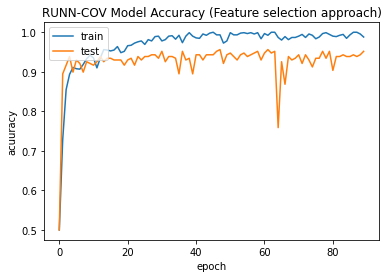

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('RUNN-COV Model Accuracy (Feature selection approach)')
plt.ylabel('acuuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

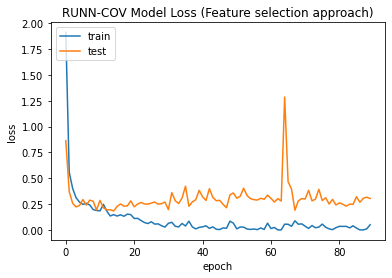

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RUNN-COV Model Loss (Feature selection approach)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
prediction = AN.predict(st_xtest)

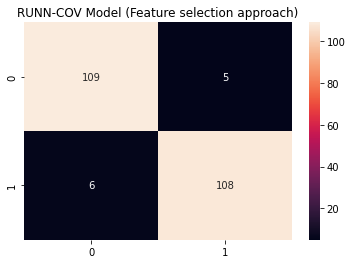

In [59]:
from sklearn.metrics import confusion_matrix

ocm=confusion_matrix(y_test.argmax(axis=1),prediction.argmax(axis=1))
plt.title('RUNN-COV Model (Feature selection approach)')
sns.heatmap(ocm,annot=True,fmt="d")

In [60]:
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score,hamming_loss
from sklearn import metrics
print("matthews_corrcoef",matthews_corrcoef(y_test.argmax(axis=1), prediction.argmax(axis=1)))
print("cohen_kappa_score",cohen_kappa_score(y_test.argmax(axis=1), prediction.argmax(axis=1)))
print("hamming_loss_score",hamming_loss(y_test.argmax(axis=1), prediction.argmax(axis=1)))
print("Precision_score", metrics.precision_score(y_test.argmax(axis=1), prediction.argmax(axis=1)))
print("Pecall_score",metrics.recall_score(y_test.argmax(axis=1), prediction.argmax(axis=1)))
print("F1_score",metrics.f1_score(y_test.argmax(axis=1), prediction.argmax(axis=1)))
print("Accuracy_score",metrics.accuracy_score(y_test.argmax(axis=1), prediction.argmax(axis=1)))
print("Roc_auc_score",metrics.roc_auc_score(y_test.argmax(axis=1),prediction.argmax(axis=1)))
print("Fbeta_score",metrics.fbeta_score(y_test.argmax(axis=1), prediction.argmax(axis=1), beta=0.5))
print("Fbeta_score",metrics.fbeta_score(y_test.argmax(axis=1), prediction.argmax(axis=1), beta=1))
print("Fbeta_score",metrics.fbeta_score(y_test.argmax(axis=1), prediction.argmax(axis=1), beta=2))

matthews_corrcoef 0.9035435349690991
cohen_kappa_score 0.9035087719298246
hamming_loss_score 0.04824561403508772
Precision_score 0.9557522123893806
Pecall_score 0.9473684210526315
F1_score 0.9515418502202644
Accuracy_score 0.9517543859649122
Roc_auc_score 0.9517543859649122
Fbeta_score 0.9540636042402826
Fbeta_score 0.9515418502202644
Fbeta_score 0.9490333919156414


In [62]:
seed = 7
np.random.seed(seed)
x_train,x_test,y_train,y_test = train_test_split(new_X,new_y,test_size=0.20,random_state=seed,shuffle=True)

In [63]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [64]:
predictions = clf.predict(x_test)

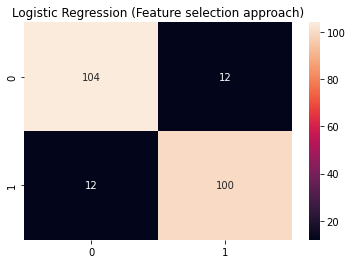

In [65]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
plt.title('Logistic Regression (Feature selection approach)')
sns.heatmap(cm,annot=True,fmt="d")

In [66]:
print("matthews_corrcoef",matthews_corrcoef(y_test, predictions))
print("cohen_kappa_score",cohen_kappa_score(y_test, predictions))
print("hamming_loss_score",hamming_loss(y_test, predictions))
print("Precision_score", metrics.precision_score(y_test, predictions))
print("Pecall_score",metrics.recall_score(y_test, predictions))
print("F1_score",metrics.f1_score(y_test, predictions))
print("Accuracy_score",metrics.accuracy_score(y_test, predictions))
print("Roc_auc_score",metrics.roc_auc_score(y_test,predictions))
print("Fbeta_score",metrics.fbeta_score(y_test, predictions, beta=0.5))
print("Fbeta_score",metrics.fbeta_score(y_test, predictions, beta=1))
print("Fbeta_score",metrics.fbeta_score(y_test, predictions, beta=2))

matthews_corrcoef 0.7894088669950738
cohen_kappa_score 0.7894088669950738
hamming_loss_score 0.10526315789473684
Precision_score 0.8928571428571429
Pecall_score 0.8928571428571429
F1_score 0.8928571428571429
Accuracy_score 0.8947368421052632
Roc_auc_score 0.8947044334975369
Fbeta_score 0.8928571428571429
Fbeta_score 0.8928571428571429
Fbeta_score 0.8928571428571429


In [67]:
neigh = KNeighborsClassifier()
neigh.fit(x_train, y_train)

KNeighborsClassifier()

In [68]:
knnpredictions = neigh.predict(x_test)

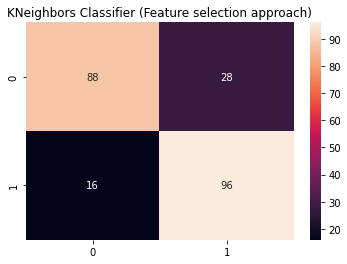

In [69]:
from sklearn.metrics import confusion_matrix
knn=confusion_matrix(y_test,knnpredictions)
plt.title('KNeighbors Classifier (Feature selection approach)')
sns.heatmap(knn,annot=True,fmt="d")

In [71]:
print("matthews_corrcoef",matthews_corrcoef(y_test, knnpredictions))
print("cohen_kappa_score",cohen_kappa_score(y_test, knnpredictions))
print("hamming_loss_score",hamming_loss(y_test, knnpredictions))
print("Precision_score", metrics.precision_score(y_test, knnpredictions))
print("Pecall_score",metrics.recall_score(y_test, knnpredictions))
print("F1_score",metrics.f1_score(y_test, knnpredictions))
print("Accuracy_score",metrics.accuracy_score(y_test, knnpredictions))
print("Roc_auc_score",metrics.roc_auc_score(y_test,knnpredictions))
print("Fbeta_score",metrics.fbeta_score(y_test, knnpredictions, beta=0.5))
print("Fbeta_score",metrics.fbeta_score(y_test, knnpredictions, beta=1))
print("Fbeta_score",metrics.fbeta_score(y_test, knnpredictions, beta=2))

matthews_corrcoef 0.6180512211050535
cohen_kappa_score 0.6146281499692686
hamming_loss_score 0.19298245614035087
Precision_score 0.7741935483870968
Pecall_score 0.8571428571428571
F1_score 0.8135593220338982
Accuracy_score 0.8070175438596491
Roc_auc_score 0.8078817733990148
Fbeta_score 0.7894736842105263
Fbeta_score 0.8135593220338982
Fbeta_score 0.8391608391608392


In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [73]:
rfpredictions = rf.predict(x_test)

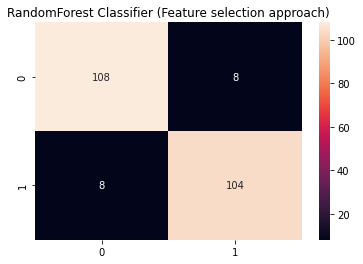

In [74]:
from sklearn.metrics import confusion_matrix
rfc=confusion_matrix(y_test,rfpredictions)
plt.title('RandomForest Classifier (Feature selection approach)')
sns.heatmap(rfc,annot=True,fmt="d")

In [75]:
print("matthews_corrcoef",matthews_corrcoef(y_test, rfpredictions))
print("cohen_kappa_score",cohen_kappa_score(y_test, rfpredictions))
print("hamming_loss_score",hamming_loss(y_test, rfpredictions))
print("Precision_score", metrics.precision_score(y_test, rfpredictions))
print("Pecall_score",metrics.recall_score(y_test, rfpredictions))
print("F1_score",metrics.f1_score(y_test, rfpredictions))
print("Accuracy_score",metrics.accuracy_score(y_test, rfpredictions))
print("Roc_auc_score",metrics.roc_auc_score(y_test,rfpredictions))
print("Fbeta_score",metrics.fbeta_score(y_test, rfpredictions, beta=0.5))
print("Fbeta_score",metrics.fbeta_score(y_test, rfpredictions, beta=1))
print("Fbeta_score",metrics.fbeta_score(y_test, rfpredictions, beta=2))

matthews_corrcoef 0.8596059113300493
cohen_kappa_score 0.8596059113300493
hamming_loss_score 0.07017543859649122
Precision_score 0.9285714285714286
Pecall_score 0.9285714285714286
F1_score 0.9285714285714286
Accuracy_score 0.9298245614035088
Roc_auc_score 0.9298029556650247
Fbeta_score 0.9285714285714286
Fbeta_score 0.9285714285714286
Fbeta_score 0.9285714285714286


In [76]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(x_train, y_train)

SVC()

In [77]:
svmpredictions = SVM.predict(x_test)

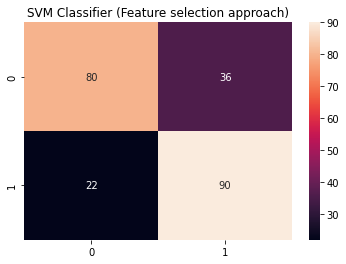

In [78]:
from sklearn.metrics import confusion_matrix
svm=confusion_matrix(y_test,svmpredictions)
plt.title('SVM Classifier (Feature selection approach)')
sns.heatmap(svm,annot=True,fmt="d")

In [80]:
print("matthews_corrcoef",matthews_corrcoef(y_test, svmpredictions))
print("cohen_kappa_score",cohen_kappa_score(y_test, svmpredictions))
print("hamming_loss_score",hamming_loss(y_test, svmpredictions))
print("Precision_score", metrics.precision_score(y_test, svmpredictions))
print("Pecall_score",metrics.recall_score(y_test, svmpredictions))
print("F1_score",metrics.f1_score(y_test, svmpredictions))
print("Accuracy_score",metrics.accuracy_score(y_test, svmpredictions))
print("Roc_auc_score",metrics.roc_auc_score(y_test,svmpredictions))
print("Fbeta_score",metrics.fbeta_score(y_test, svmpredictions, beta=0.5))
print("Fbeta_score",metrics.fbeta_score(y_test, svmpredictions, beta=1))
print("Fbeta_score",metrics.fbeta_score(y_test, svmpredictions, beta=2))

matthews_corrcoef 0.4959057440016278
cohen_kappa_score 0.4921658986175116
hamming_loss_score 0.2543859649122807
Precision_score 0.7142857142857143
Pecall_score 0.8035714285714286
F1_score 0.7563025210084034
Accuracy_score 0.7456140350877193
Roc_auc_score 0.7466133004926109
Fbeta_score 0.7305194805194806
Fbeta_score 0.7563025210084034
Fbeta_score 0.7839721254355402
